In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Dataset yang digunakan adalah dataset terkait kondisi dan gaya hidup seseorang yang akan memengaruhi apakah orang tersebut menderita penyakit stroke atau tidak. Atribut-atribut yang dapat dimanfaatkan untuk melakukan analisis dapat dilihat pada cell diatas. Atribut-atribut tersebut yakni:
1. Gender  
  Menyatakan jenis kelamin dari seseorang
2. Age  
 Umur dari seseorang
3. Hypertension  
1 menandakan menderita hipertensi dan 0 sebaliknya
4. Heart_disease  
1 menandakan menderita penyakit jantung dan 0 sebaliknya
5. Ever_married  
Menandakan apakah orang tersebut pernah menikah
6. Work_type  
Jenis pekerjaan
7. Residence type
8. avg_glucose_level  
Menunjukkan rata-rata kadar gula seseorang
9. bmi  
Menyatakan Body Mass Index dari seseorang.
10. smoking_status  
Menyatakan status seseorang apakah pernah merokok atau tidak

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


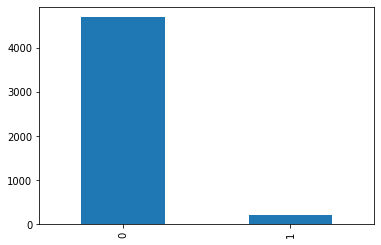

In [9]:
df['stroke'].value_counts().plot(kind="bar")

Dari grafik diatas, dapat dilihat bahwa persebaran dari dataset tersebut menunjukkan bahwa sebagian besar subjek tersebut tidak menderita stroke. Agar lebih spesifik, maka dataframenya akan dipangkas sehingga hanya penderita stroke saja yang akan digunakan dalam kasus ini. Pemangkasan jumlah data tersebut dapat dilihat pada cell dibawah

In [10]:
df_stroke_disease = df.loc[df['stroke'] == 1, :]

In [11]:
df_stroke_disease['age'] = df_stroke_disease['age'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Visualisasi

Pada bagian visualisasi ini, sebagian besar atribut akan divisualisan untuk memperlihatkan persebaran penderita stroke berdasarkan atribut tertentu

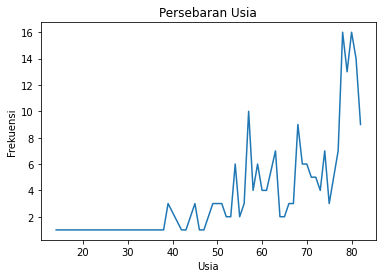

In [12]:
df_stroke_disease['age'].value_counts(sort=False).plot(kind="line", xlabel="Usia", ylabel="Frekuensi", title="Persebaran Usia")

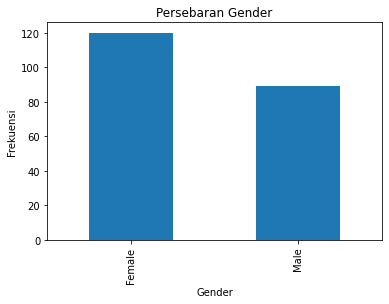

In [13]:
df_stroke_disease['gender'].value_counts().plot(kind="bar", xlabel="Gender", ylabel="Frekuensi", title="Persebaran Gender")

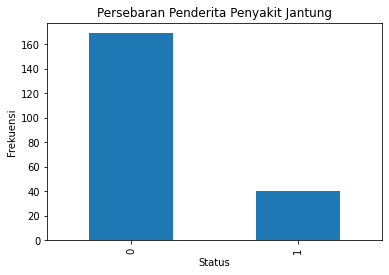

In [14]:
df_stroke_disease['heart_disease'].value_counts().plot(kind="bar", xlabel="Status", ylabel="Frekuensi", title="Persebaran Penderita Penyakit Jantung")

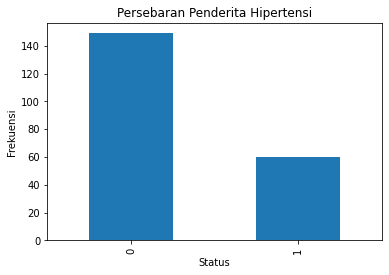

In [15]:
df_stroke_disease['hypertension'].value_counts().plot(kind="bar", xlabel="Status", ylabel="Frekuensi", title="Persebaran Penderita Hipertensi")

Text(0, 0.5, '')

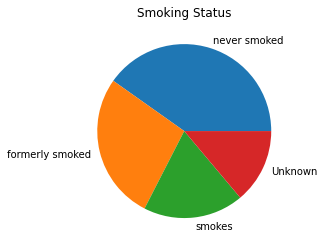

In [16]:
ax = df_stroke_disease['smoking_status'].value_counts().plot(kind="pie", title="Smoking Status")
ax.set_ylabel("")

## Deskripsi


In [17]:
## Deskripsi dataframe awal
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,NaN
mean,37064.313506,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,20995.098457,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,77.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,18605.000000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,37608.000000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,55220.000000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,0.000000


In [18]:
## Deskripsi dataframe yang untuk kasus stroke
df_stroke_disease.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,209.000000,209,209.000000,209.000000,209.000000,209,209,209,209.000000,209.000000,209,209.0
unique,NaN,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,120,NaN,NaN,NaN,186,127,109,NaN,NaN,84,NaN
mean,37546.038278,NaN,67.712919,0.287081,0.191388,NaN,NaN,NaN,134.571388,30.471292,NaN,1.0
std,22078.273383,NaN,12.402848,0.453486,0.394338,NaN,NaN,NaN,62.462047,6.329452,NaN,0.0
min,210.000000,NaN,14.000000,0.000000,0.000000,NaN,NaN,NaN,56.110000,16.900000,NaN,1.0
25%,17308.000000,NaN,58.000000,0.000000,0.000000,NaN,NaN,NaN,80.430000,26.400000,NaN,1.0
50%,36857.000000,NaN,70.000000,0.000000,0.000000,NaN,NaN,NaN,106.580000,29.700000,NaN,1.0
75%,56939.000000,NaN,78.000000,1.000000,0.000000,NaN,NaN,NaN,196.920000,33.700000,NaN,1.0
